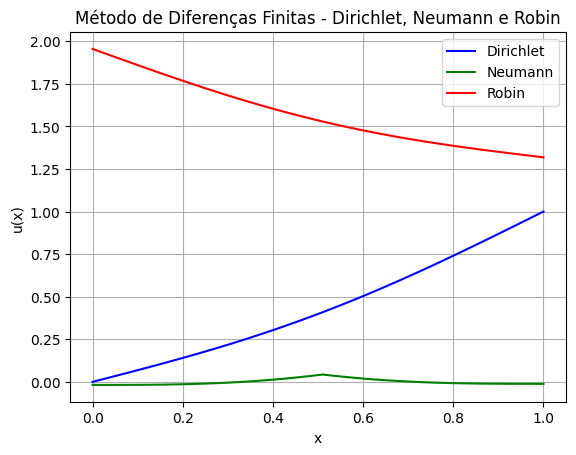

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Definir o intervalo e o número de pontos
L = 1.0  # Comprimento do domínio
n = 50   # Número de pontos
h = L / (n - 1)  # Tamanho do passo

# Função f(x) (EDO sendo resolvida)
def f(x):
    return np.sin(np.pi * x)  # Função arbitrária para teste

# Função para resolver usando diferenças finitas com diferentes condições de contorno
def solve_dif_fin(con_type="Dirichlet", a0=0, aL=1, alpha=1, beta=1, gamma=1):
    # Montar a matriz A e o vetor b
    A = np.zeros((n, n))
    b = np.zeros(n)

    # Preencher A e b no interior (x1 a x_{n-1})
    for i in range(1, n-1):
        A[i, i-1] = 1 / h**2
        A[i, i] = -2 / h**2
        A[i, i+1] = 1 / h**2
        b[i] = f(i * h)

    # Condições de contorno
    if con_type == "Dirichlet":
        # Dirichlet: u(0) = a0, u(L) = aL
        A[0, 0] = 1
        A[-1, -1] = 1
        b[0] = a0
        b[-1] = aL

    elif con_type == "Neumann":
        # Neumann: u'(0) = a0, u'(L) = aL
        A[0, 0] = -1 / h
        A[0, 1] = 1 / h
        b[0] = a0
        A[-1, -2] = -1 / h
        A[-1, -1] = 1 / h
        b[-1] = aL

        # Fixar o valor médio em zero para garantir solução única (condição extra)
        A[n//2, :] = np.ones(n)
        b[n//2] = 0

    elif con_type == "Robin":
        # Robin: alpha*u(0) + beta*u'(0) = gamma
        A[0, 0] = alpha - beta / h
        A[0, 1] = beta / h
        b[0] = gamma
        # Na fronteira direita: alpha*u(L) + beta*u'(L) = gamma
        A[-1, -1] = alpha + beta / h
        A[-1, -2] = -beta / h
        b[-1] = gamma

    # Resolver o sistema linear
    u = np.linalg.solve(A, b)
    return u

# Visualizar as soluções
x = np.linspace(0, L, n)

# Dirichlet
u_dirichlet = solve_dif_fin(con_type="Dirichlet", a0=0, aL=1)
plt.plot(x, u_dirichlet, label="Dirichlet", color="blue")

# Neumann
u_neumann = solve_dif_fin(con_type="Neumann", a0=0, aL=0)
plt.plot(x, u_neumann, label="Neumann", color="green")

# Robin
u_robin = solve_dif_fin(con_type="Robin", alpha=1, beta=1, gamma=1)
plt.plot(x, u_robin, label="Robin", color="red")

# Gráfico final
plt.xlabel("x")
plt.ylabel("u(x)")
plt.title("Método de Diferenças Finitas - Dirichlet, Neumann e Robin")
plt.legend()
plt.grid(True)
plt.show()